# Seinfeld Script Generation

In [1]:
#Import Necessary Packages
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import re
import string
import matplotlib.pyplot as plt
import sys
import operator
import argparse
import numpy as np
import nltk

c:\users\jai dave\anaconda3\envs\lstm\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
c:\users\jai dave\anaconda3\envs\lstm\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
c:\users\jai dave\anaconda3\envs\lstm\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


## Exploratory Data Analysis

In [2]:
#Load text file
text = (open("Seinfeld_Scripts.txt").read())
text=text.lower()

In [28]:
print('Number of Characters:', len(text))
print('Number of distinct Characters:', len(set(text)))

Number of Characters 109410
Number of distinct Characters 60


In [ ]:
#Obtain the frequency of each word
match_pattern = re.findall(r'\b[a-z]{5,15}\b', text)
frequency = {}

for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1

frequency_list = frequency.keys()

for words in frequency_list:
    print(words, frequency[words])

In [4]:
#Create a list of tuples containing the word and the frequency of the word
results = []
for word in frequency_list:
    tuple = (word, frequency[word])
    results.append(tuple)

In [5]:
#Sort the list
byFreq=sorted(results, key=lambda word: word[1], reverse=True)

In [6]:
#Top ten most frequent words
byFreq[:10]

[('jerry', 581),
 ('george', 414),
 ('elaine', 380),
 ('kramer', 207),
 ('there', 89),
 ('right', 65),
 ('about', 55),
 ('think', 47),
 ('gonna', 46),
 ('going', 42)]

In [7]:
#Seperate tuples into seperate lists
words_names=[]
words_count=[]
for (word, freq) in byFreq[:10]:
    print (word, freq)
    words_names.append(word)
    words_count.append(freq)

jerry 581
george 414
elaine 380
kramer 207
there 89
right 65
about 55
think 47
gonna 46
going 42


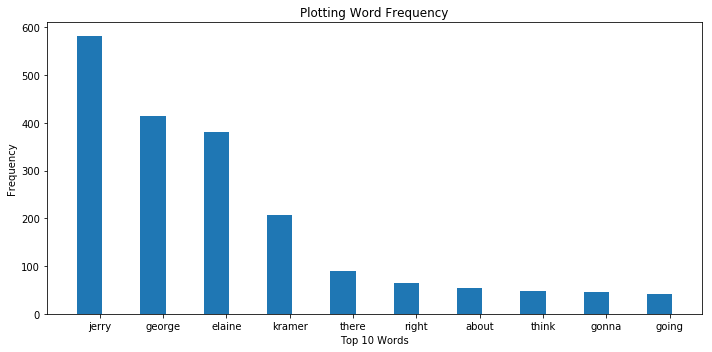

In [30]:
# Plot histogram using matplotlib bar()
plt.figure(figsize=(10,5))
plt.xlabel('Top 10 Words')
plt.ylabel('Frequency')
plt.title('Plotting Word Frequency')
indexes = np.arange(len(words_names) )
width = .4
plt.bar(indexes, words_count, width)
plt.xticks(indexes + width * .4, words_names)
#plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
nltk.download_shell()

In [10]:
#Using nltk tokenize text
tokens = nltk.word_tokenize(text)
mytext = nltk.Text(tokens)

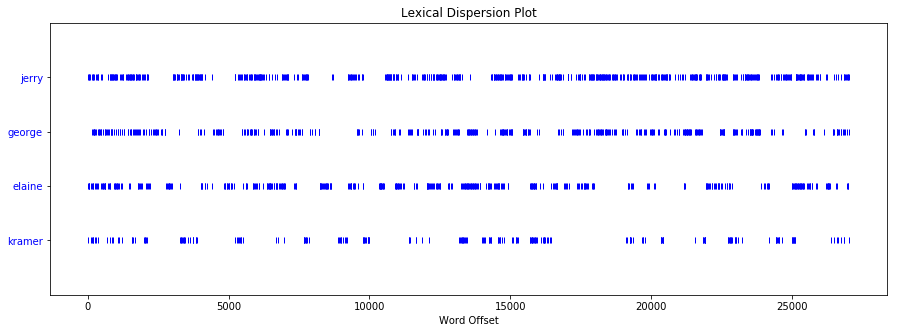

In [32]:
#Plot dispersion plot showing when and how often names are mentioned
plt.figure(figsize=(15,5))
mytext.dispersion_plot(["jerry", "george", "elaine", "kramer"])

## Testing LSTM Neural Networks

In [11]:
#Map characters to numbers
characters = sorted(list(set(text)))

n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

In [4]:
#Create training and target arrays
X = []
Y = []
length = len(text)
seq_length = 100

for i in range(0, length-seq_length, 1):
    sequence = text[i:i + seq_length]
    label =text[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

In [5]:
#Reshape and scale X. Use one hot encoding for y
X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = np_utils.to_categorical(Y)

In [35]:
#Create simple neural network
model = Sequential()
model.add(LSTM(100, input_shape=(X_modified.shape[1], X_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(Y_modified.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [9]:
#Train simple model
model.fit(X_modified, Y_modified, epochs=1, batch_size=100)

Epoch 1/1
109310/109310 [==============================] - 1816s 17ms/step - loss: 2.9699


In [10]:
#Create prediction text
string_mapped = X[99]
full_string = [n_to_char[value] for value in string_mapped]
# generating characters
for i in range(400):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(characters))

    pred_index = np.argmax(model.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])

    string_mapped.append(pred_index)
    string_mapped = string_mapped[1:len(string_mapped)]

In [11]:
#Print prediction text
txt=""
for char in full_string:
    txt = txt+char
txt

"h)\njerry: (to elaine) let me ask you a question.\nelaine: mm-hm.\njerry: you're a hostage, captured bye the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the th"

In [32]:
#Create training and target arrays
X = []
Y = []
length = len(text)
seq_length = 100

for i in range(0, length-seq_length, 1):
    sequence = text[i:i + seq_length]
    label =text[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

In [33]:
#Reshape and scale X. Use One hot encoding for Y
X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = np_utils.to_categorical(Y)

In [8]:
#Create Early Stopping Monitor
early_stopping_monitor = EarlyStopping(patience = 2)

In [ ]:
#Train the model using 50 epochs
model.fit(X_modified, Y_modified, epochs=50, batch_size=50, callbacks = [early_stopping_monitor])

In [15]:
model.save_weights('model2.h5')

In [16]:
model.load_weights('model2.h5')

In [ ]:
#Create prediction text
string_mapped = X[99]
full_string = [n_to_char[value] for value in string_mapped]
# generating characters
for i in range(400):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(characters))

    pred_index = np.argmax(model.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])

    string_mapped.append(pred_index)
    string_mapped = string_mapped[1:len(string_mapped)]

In [34]:
#Create prediction text
txt=""
for char in full_string:
    txt = txt+char
txt

"h)\njerry: (to elaine) let me ask you a question.\nelaine: mm-hm.\njerry: you're a hostage, captured by the tame out of the sale gor the shonod the was and the sale tie tame eisersiie are to the shooow of the sale eoon the couertion of the sale eoon the couer of the sale eoon the couertion of the sale eoon the couertion.\n \n \ngeorge: yeah. weah, i don't know what i say io the was of the sale wanking to the shinks of the same good and the sale eoon the couertion of the street. i got the shnnop of the"

In [11]:
#Created training and target arrays
X = []
Y = []
length = len(text)
seq_length = 100

for i in range(0, length-seq_length, 1):
    sequence = text[i:i + seq_length]
    label =text[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

In [12]:
#Reshape and Scale X. Use One Hot Encoding on Y
X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = np_utils.to_categorical(Y)

In [18]:
#Create neural network with more 200 nodes
model = Sequential()
model.add(LSTM(200, input_shape=(X_modified.shape[1], X_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200))
model.add(Dropout(0.2))

model.add(Dense(Y_modified.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [19]:
early_stopping_monitor = EarlyStopping(patience = 2)

In [ ]:
#Train model with 100 epochs
model.fit(X_modified, Y_modified, epochs=100, batch_size=50, callbacks = [early_stopping_monitor])

In [22]:
#Create prediction text
string_mapped = X[99]
full_string = [n_to_char[value] for value in string_mapped]
# generating characters
for i in range(400):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(characters))
    pred_index = np.argmax(model.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])
    string_mapped.append(pred_index)
    string_mapped = string_mapped[1:len(string_mapped)]

In [23]:
#Print prediction text
txt=""
for char in full_string:
    txt = txt+char
txt

"h)\njerry: (to elaine) let me ask you a question.\nelaine: mm-hm.\njerry: you're a hostage, captured by the opposite of my lame in the cid he and george an oyt leatery passer and she says the sacle tp the thonopad works on the hoop wour sime shat wour hard sere for a call ort to mnee at the mopo of the can and she samking about the sope fach oige the wash in the coffee thop the shonop.\ngeorge: i don't know wou do the samd bout on the street.\nelaine: what about the soup nazi.\n \nelaine: yeah. i know "

In [12]:
#Create training and target arrays
X = []
Y = []
length = len(text)
seq_length = 100

for i in range(0, length-seq_length, 1):
    sequence = text[i:i + seq_length]
    label =text[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

In [13]:
#Reshape and transform X. Use one hot encoding for Y
X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = np_utils.to_categorical(Y)

In [14]:
#Create neural network with 400 nodes
model = Sequential()
model.add(LSTM(400, input_shape=(X_modified.shape[1], X_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(400, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(400))
model.add(Dropout(0.2))
model.add(Dense(Y_modified.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
#Train model over 100 epochs
model.fit(X_modified, Y_modified, epochs=100, batch_size=50)http://localhost:8888/notebooks/Capstone_Project2.ipynb

In [16]:
#Create prediction text
string_mapped = X[99]
full_string = [n_to_char[value] for value in string_mapped]
# generating characters
for i in range(400):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(characters))
    pred_index = np.argmax(model.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])
    string_mapped.append(pred_index)
    string_mapped = string_mapped[1:len(string_mapped)]

In [17]:
#Print prediction text
txt=""
for char in full_string:
    txt = txt+char
txt

"h)\njerry: (to elaine) let me ask you a question.\nelaine: mm-hm.\njerry: you're a hostage, captured by terrorists-\nelaine: (smiling, choekding) nh. it's ouerty good. huh?\n \njerry: well, well.  \nsusan: himho. you're there and they don't have to say for yourself.\nelaine: oh, it was nike for me to be around no tomething.\njerry: (pointing) yeah. i'm aoming. i'm vellin' he didn't shake it up in the meeting?\n \n(jerry picks up the money, cousinuation to the bouiter) she's sleeping with his mother)\ngeorge"

In [29]:
#Create training and target arrays
X = []
Y = []
length = len(text)
seq_length = 100

for i in range(0, length-seq_length, 1):
    sequence = text[i:i + seq_length]
    label =text[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

In [30]:
#Reshape and transform X. Use one hot encoding for Y
X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = np_utils.to_categorical(Y)

In [31]:
#Create neural network with 700 nodes
model = Sequential()
model.add(LSTM(700, input_shape=(X_modified.shape[1], X_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(700, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(700))
model.add(Dropout(0.2))
model.add(Dense(Y_modified.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
#Train model with 25 epochs
model.fit(X_modified, Y_modified, epochs=25, batch_size=50)

model.save_weights('model4.h5')

In [34]:
#Create prediction text
string_mapped = X[99]
full_string = [n_to_char[value] for value in string_mapped]
# generating characters
for i in range(400):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(characters))
    pred_index = np.argmax(model.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])
    string_mapped.append(pred_index)
    string_mapped = string_mapped[1:len(string_mapped)]

In [35]:
#Print prediction text
txt=""
for char in full_string:
    txt = txt+char
txt

'h)\njerry: (to elaine) let me ask you a question.\nelaine: mm-hm.\njerry: you\'re a hostage, captured by toup.\n \njerry: well, i got two bame of the convestation. ie saids the table and the says the seaction hall the window and that heorge says " the shme with the ohone.\nelaine: what?\ngeorge: yeah, ie didn\'t have the truth!(he says the seseemt is up and ie says to her and the says to het to het to het to and they could hiv toup in the coffee thop.\n \njerry: what is that iappened?\njerry: i don\'t know. '